# Sentiment Analysis of Friends TV Show Scripts

---

- Sentiment analysis using:
  - afinn
  - bing
  - loughran
  - nrc
- Missing data techniques on combined sentiment data

## Package Imports and Data

---

In [58]:
# Package Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import euclidean_distances


In [2]:
# Script data
quotes = pd.read_csv("../data/friends_quotes.csv")
# read the sentiment analysis datasets
afinn = pd.read_csv("../data/afinn.csv")
bing = pd.read_csv("../data/bing.csv")
loughran = pd.read_csv("../data/loughran.csv")
nrc = pd.read_csv("../data/nrc.csv")

In [4]:
main_characters = [
    "Ross",
    "Rachel",
    "Monica",
    "Chandler",
    "Joey",
    "Phoebe",
]
quotes_main_characters = quotes[
    quotes["author"].isin(main_characters)
].copy()
quotes_main_characters.head()

,author,episode_number,episode_title,quote,quote_order,season
0,Monica,1.0,Monica Gets A Roommate,There's nothing to tell! He's just some guy I ...,0.0,1.0
1,Joey,1.0,Monica Gets A Roommate,"C'mon, you're going out with the guy! There's ...",1.0,1.0
2,Chandler,1.0,Monica Gets A Roommate,"All right Joey, be nice. So does he have a hum...",2.0,1.0
3,Phoebe,1.0,Monica Gets A Roommate,"Wait, does he eat chalk?",3.0,1.0
4,Phoebe,1.0,Monica Gets A Roommate,"Just, 'cause, I don't want her to go through w...",4.0,1.0


## Sentiment Analysis

---

### AFINN

- Each Character's quotes are scored using the AFINN-111 sentiment analysis word list.
  - All seasons average score
  - Each season average score

Average score definition:

- If the quote contains a word from the AFINN-111 list
- quote_count += 1
- quote_score = all AFINN-111 words score / number of AFINN-111 words in the quote
- Average score = quote_score / quote_count


In [11]:
# Empty DataFrame for AFINN results
afinn_results = pd.DataFrame(
    columns=quotes_main_characters["season"].unique().tolist() + ["all_seasons"],
    index=main_characters + ["all_characters"]
)
afinn_results = afinn_results.astype(float).fillna(0)
afinn_results.index.name = "author"
afinn_results.columns.name = "season"

In [17]:
def get_quote_score(quote: str) -> float | None:
    """
    Get the AFINN score of a quote.
    """
    # Split the quote into words
    words = quote.split()
    # Get the AFINN score for each word
    scores = [afinn[afinn["word"] == word]["value"].values[0] for word in words if word in afinn["word"].values]
    # Calculate the average score
    if len(scores) > 0:
        return sum(scores) / len(scores)
    else:
        return None

quotes_score = quotes_main_characters[["author", "season", "quote"]].copy()
quotes_score["quote_score"] = quotes_score["quote"].apply(get_quote_score)
quotes_score.dropna(subset=["quote_score"], inplace=True)
quotes_score.head()


,author,season,quote,quote_score
1,Joey,1.0,"C'mon, you're going out with the guy! There's ...",-2.0
4,Phoebe,1.0,"Just, 'cause, I don't want her to go through w...",1.0
6,Chandler,1.0,Sounds like a date to me.,2.0
16,Chandler,1.0,"Finally, I figure I'd better answer it, and it...",2.0
18,Joey,1.0,"This guy says hello, I wanna kill myself.",-3.0


<Axes: xlabel='season'>

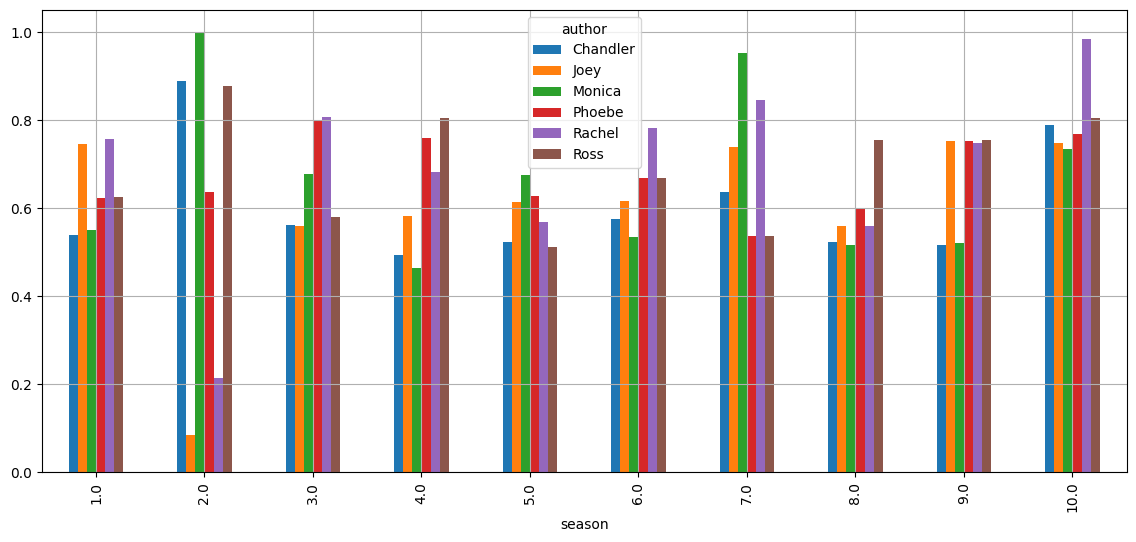

In [53]:
# pivot the quotes_score, index = name,  column = season, value = quote score, aggfunc = mean
quotes_score_pivot = quotes_score.pivot_table(
    index="author",
    columns="season",
    values="quote_score",
    aggfunc="mean",
)

quotes_score_pivot.T.plot(kind="bar", legend=True, figsize=(14, 6), grid=True)


<Axes: xlabel='season'>

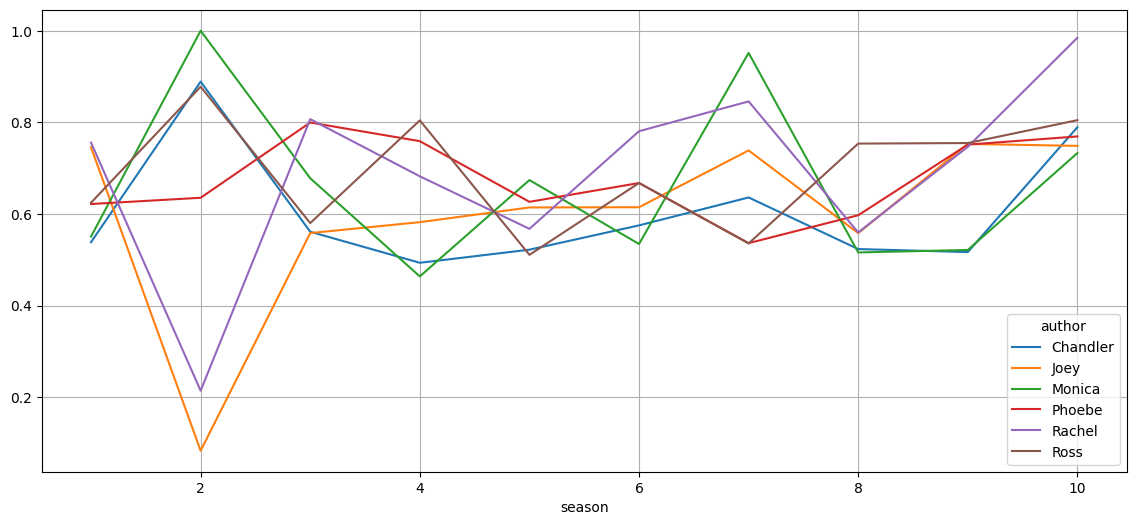

In [54]:
quotes_score_pivot.T.plot(legend=True, figsize=(14, 6), grid=True)

<Axes: xlabel='season'>

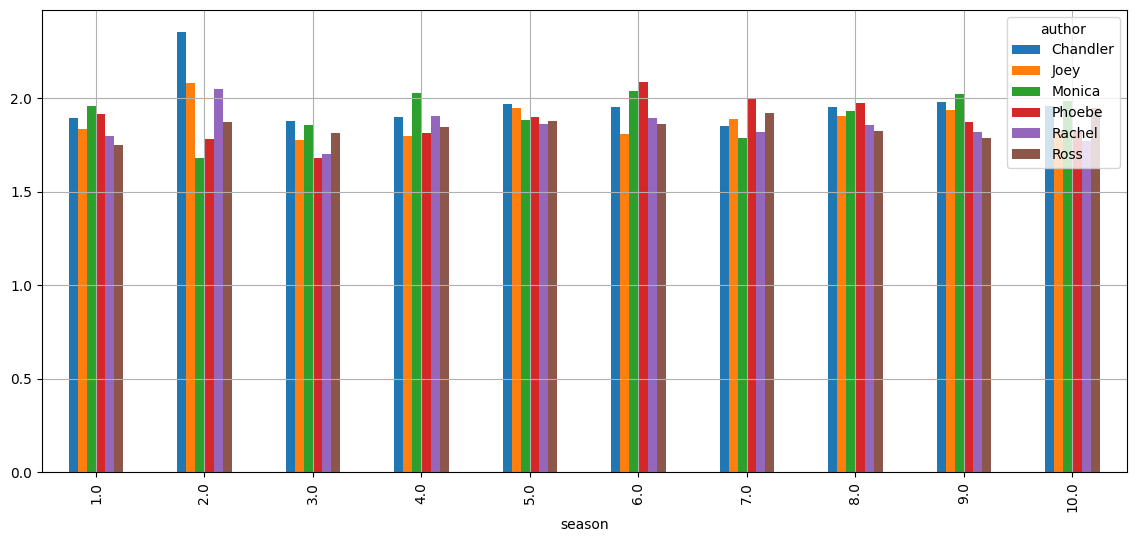

In [56]:
# pivot the quotes_score, index = name,  column = season, value = quote count
quotes_std = quotes_score.pivot_table(
    index="author",
    columns="season",
    values="quote_score",
    aggfunc="std"
)

quotes_std.T.plot(kind="bar", legend=True, figsize=(14, 6), grid=True)

<Axes: xlabel='season'>

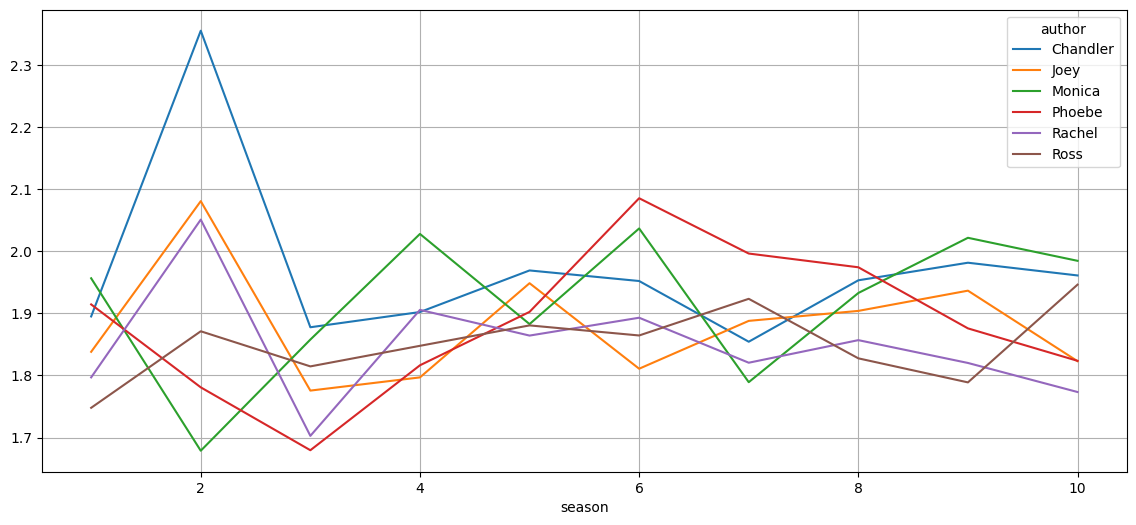

In [55]:
quotes_std.T.plot(legend=True, figsize=(14, 6), grid=True)